In [1]:
## Note: Hand Calculations in 2 variables, 3 examples/rows is explained in another notebook of same name. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


**handling missing values**

In [4]:
import math
median_bedrooms = math.floor(df.bedrooms.median()) #median is 4.5 rounding it off to 4
median_bedrooms

4

In [5]:
df.bedrooms.fillna(median_bedrooms) #filling missing values ad genererating a series

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [6]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms) #assigning pandas series to dataframe
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
df.iloc[:,0:3] # model.fit takes dataframe as first arguement

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [8]:
model = LinearRegression()
model.fit(df.iloc[:,0:3],df.price) #fit(dataframe,series)
# model.fit(df[['area','bedrooms','age']],df.price) # alternate method

LinearRegression()

In [9]:
model.coef_ #3 coefficients/3 slopes , for 3 independant variable

array([  112.06244194, 23388.88007794, -3231.71790863])

In [10]:
model.intercept_ # y = m1x1 + m2x2 + m3x3 + b (intercept is always same)

221323.00186540425

In [11]:
model.predict(df.iloc[:,0:3]) #predicting for same training data
# model.predict(df[['area','bedrooms','age']]) # alternate method

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [12]:
model.predict([[3000,3,40]]) # random predicton

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [13]:
'''proof?
y = m1x1 + m2x2 + m3x3 + b'''
112.06244194*3000 + 3*23388.88007794 + 40*-3231.71790863 + 221323.00186540425

498408.25157402427

In [14]:
pred = model.predict(df.iloc[:,0:3]) #assigning variable
pred

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [15]:
df['prediction'] = pred
df

,area,bedrooms,age,price,prediction
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755
5,4100,6.0,8,810000,795258.551027


'''Here we are trying to plot price vs all other variables graph. 
Graphs can be plotted, but the point worth mentioning is that the training prices and predicted prices 
are the effect of all the other 3 variables. So the price here is the function of all 3 variables.
So the graphs plotted after predictions will also take all the other variables in account.
So Plotting individual variable vs price is not the correct approach here. It will show just another dimension which includes 
all variables. This is also the reason why we are not getting a straight line here.
(when single variable is considered we get a straight line as it is not affected by other variables) '''

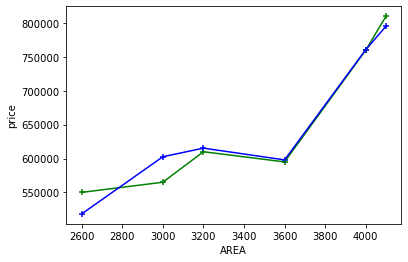

In [17]:
%matplotlib inline
plt.xlabel('AREA')
plt.ylabel('price')

plt.scatter(df.area,df.price,color= 'green',marker = '+') #plots markers training price
plt.plot(df.area,df.price,color= 'green') #plots line traing price

plt.scatter(df.area,df.prediction,color= 'blue',marker = '+') #plots markers predicted price
plt.plot(df.area,df.prediction,color= 'blue') # plots line predicted price 

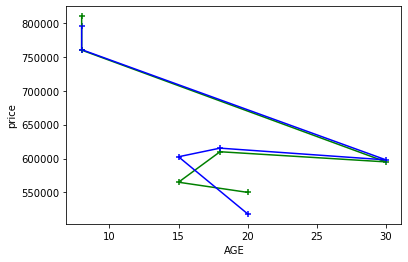

In [18]:
%matplotlib inline
plt.xlabel('AGE')
plt.ylabel('price')

plt.scatter(df.age,df.price,color= 'green',marker = '+') #plots markers training price
plt.plot(df.age,df.price,color= 'green') #plots line traing price

plt.scatter(df.age,df.prediction,color= 'blue',marker = '+') #plots markers predicted price
plt.plot(df.age,df.prediction,color= 'blue') # plots line predicted price 

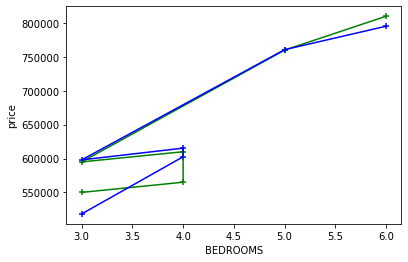

In [19]:
%matplotlib inline
plt.xlabel('BEDROOMS')
plt.ylabel('price')

plt.scatter(df.bedrooms,df.price,color= 'green',marker = '+') #plots markers training price
plt.plot(df.bedrooms,df.price,color= 'green') #plots line traing price

plt.scatter(df.bedrooms,df.prediction,color= 'blue',marker = '+') #plots markers predicted price
plt.plot(df.bedrooms,df.prediction,color= 'blue') # plots line predicted price 